In [ ]:
zip_path = '/content/drive/My\ Drive/Images/santa-dataset.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/santa-dataset.zip -d /content

!rm /content/santa-dataset.zip

replace /content/santa-dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

vgg_conv = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in vgg_conv.layers[:]:
  layer.trainable = False

fine_tuned_model = Sequential()

fine_tuned_model.add(vgg_conv)

fine_tuned_model.add(Flatten())
fine_tuned_model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
fine_tuned_model.add(Dropout(0.5))
fine_tuned_model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)

fine_tuned_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

fine_tuned_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              25691136  
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 1025      
Total params: 40,406,849
Trainable params: 25,692,161
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.3, height_shift_range=0.3, brightness_range=[0.5,1.0],shear_range=0.1, zoom_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
dataset_dir = '/content/santa-dataset/'

train_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(224, 224))
test_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(224, 224))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:
history_vgg_model = fine_tuned_model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=20)

Epoch 1/20
6/6 [==============================] - 22s 4s/step - loss: 0.1644 - accuracy: 0.9411 - val_loss: 0.1887 - val_accuracy: 0.9346
Epoch 2/20
6/6 [==============================] - 19s 3s/step - loss: 0.1432 - accuracy: 0.9350 - val_loss: 0.1776 - val_accuracy: 0.9423
Epoch 3/20
6/6 [==============================] - 20s 3s/step - loss: 0.1573 - accuracy: 0.9350 - val_loss: 0.1728 - val_accuracy: 0.9500
Epoch 4/20
6/6 [==============================] - 20s 3s/step - loss: 0.1481 - accuracy: 0.9471 - val_loss: 0.1886 - val_accuracy: 0.9346
Epoch 5/20
6/6 [==============================] - 19s 3s/step - loss: 0.1676 - accuracy: 0.9230 - val_loss: 0.1682 - val_accuracy: 0.9462
Epoch 6/20
6/6 [==============================] - 19s 3s/step - loss: 0.1606 - accuracy: 0.9350 - val_loss: 0.1783 - val_accuracy: 0.9385
Epoch 7/20
6/6 [==============================] - 19s 3s/step - loss: 0.1683 - accuracy: 0.9305 - val_loss: 0.1517 - val_accuracy: 0.9538
Epoch 8/20
6/6 [==================

In [ ]:
history_vgg_model_dataframe = pd.DataFrame(history_vgg_model.history)
history_vgg_model_dataframe['epoch'] = history_vgg_model.epoch
history_vgg_model_dataframe

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.164368,0.941088,0.188714,0.934615,0
1,0.143231,0.935045,0.177628,0.942308,1
2,0.157286,0.935045,0.172820,0.950000,2
3,0.148131,0.947130,0.188561,0.934615,3
4,0.167553,0.922961,0.168222,0.946154,4
5,0.160605,0.935045,0.178311,0.938462,5
6,0.168341,0.930514,0.151706,0.953846,6
7,0.186604,0.925982,0.183340,0.938462,7
8,0.147952,0.938066,0.161938,0.953846,8
9,0.151306,0.941088,0.193768,0.934615,9


In [ ]:
history_vgg_model_dataframe.sort_values(by='val_accuracy', ascending=False)

,loss,accuracy,val_loss,val_accuracy,epoch
17,0.157506,0.935045,0.146829,0.961538,17
10,0.141623,0.953172,0.153606,0.953846,10
6,0.168341,0.930514,0.151706,0.953846,6
12,0.157895,0.935045,0.153267,0.953846,12
8,0.147952,0.938066,0.161938,0.953846,8
19,0.152123,0.936556,0.161890,0.953846,19
13,0.160272,0.939577,0.178256,0.950000,13
15,0.138538,0.954683,0.160622,0.950000,15
2,0.157286,0.935045,0.172820,0.950000,2
4,0.167553,0.922961,0.168222,0.946154,4


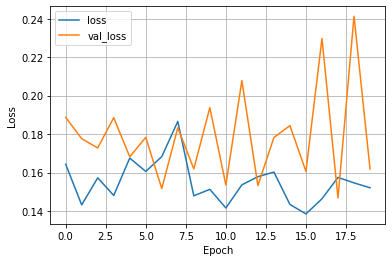

In [ ]:
plot_loss(history_vgg_model)

Dari data di atas, didapatkan nilai validation accuracy terbaik 0.961538 dan validation loss 0.146829 pada epoch 17. 

Data di dapat menggunakan fine tuning VGG16 dan hyperparameter tuning pada image augmentation.